# 静止センサのバイアスとノイズの解析例  

※）カレントフォルダ（このNotebookと同じフォルダ）にデータCSVファイルがあるものとする。

⬛︎ `pandas`, `scipy.stats`, `matplotlib.pyplot`モジュールをそれぞれ，`pd`, `stats`, `plt`という名前でインポートする：

In [198]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

⬛︎ `pandas`モジュールの`read_csv`関数を用いて，センサデータCSVファイル`'memdata_TSND121-06120699_2019-04-12_140934.329.csv'`を読み込み，変数`df`に格納する（p.244-245）：

In [206]:
df = pd.read_csv('memdata_TSND121-13121423_2019-04-16_144415.670.csv', header=None, 
                 names=['item', 'time', 'acc_x', 'acc_y', 'acc_z', 'omega_x', 'omega_y', 'omega_z'])

> センサデータCSVファイルには項目名がないため，オプション引数
```
header=None
```
と
```
names=['item', 'time', 'acc_x', 'acc_y', 'acc_z', 'omega_x', 'omega_y', 'omega_z']
```
を指定して，データフレーム`df`に項目名を設定している。

⬛︎ `df`の最上部と最下部を表示してみる(p.224)：
> `head(n)`あるいは`tail(n)` の`n`を省略すると`n`は5に取られる：

In [207]:
df.head()

,item,time,acc_x,acc_y,acc_z,omega_x,omega_y,omega_z
0,ags,53055784,-7,-29,10206,-70,-44,-6
1,ags,53055785,25,-26,10216,-70,-38,-6
2,ags,53055786,78,-72,10255,-83,-31,-24
3,ags,53055787,64,-77,10206,-89,-38,-24
4,ags,53055788,56,-79,10299,-70,-44,-12


In [208]:
df.tail()

,item,time,acc_x,acc_y,acc_z,omega_x,omega_y,omega_z
303148,ags,53358932,105,32,10140,-76,-62,-36
303149,ags,53358933,44,-24,10145,-76,-44,-30
303150,ags,53358934,27,-47,10113,-70,-38,-6
303151,ags,53358935,30,-77,10157,-83,-31,-12
303152,ags,53358936,27,-21,10262,-89,-44,-24


⬛︎ データの最初と最後の部分は怪しい（撹乱が入る場合がある）ので，`df`の10000~35000行目までを残し，後はカットすることにした(p.226)：

In [214]:
df = df.iloc[10000:290001]

⬛︎ データフレームオブジェクトのメソッド`describe()`で，データの要約統計量を見てみる：
****
**```
データフレームオブジェクト.describe()
```**  
`Return : データフレームオブジェクト`の要約統計量データフレームを返す  
`Parameters` : なし
****

In [215]:
df.describe()

,time,acc_x,acc_y,acc_z,omega_x,omega_y,omega_z
count,2.300010e+05,230001.000000,230001.000000,230001.00000,230001.000000,230001.000000,230001.000000
mean,5.319078e+07,36.753171,-51.757662,10188.22159,-77.369685,-45.510028,-16.613850
std,6.639571e+04,32.810365,30.933750,43.59417,8.790328,9.198598,8.384728
min,5.307578e+07,-114.000000,-199.000000,9972.00000,-113.000000,-92.000000,-54.000000
25%,5.313328e+07,15.000000,-72.000000,10160.00000,-83.000000,-50.000000,-24.000000
50%,5.319078e+07,37.000000,-52.000000,10189.00000,-76.000000,-44.000000,-18.000000
75%,5.324828e+07,59.000000,-31.000000,10218.00000,-70.000000,-38.000000,-12.000000
max,5.330578e+07,183.000000,93.000000,10387.00000,-40.000000,-1.000000,24.000000


> ここで，
>
> | 要約名称 | 意味 |
|---|---|
| count | 個数 |
| mean | 平均値 |
| std | 標準偏差 |
| min | 最小値 |
| 25% | 第１四分位数 |
| 50% | 第２四分位数(中央値) |
| 75% | 第３四分位数 |
| max | 最大値 |

⬛︎ データフレームオブジェクトの`hist(...)`メソッドを用いて，`df`のすべての項目についてヒストグラムを描く。  
□その前にデータフレームの全てのデータについてのヒストグラムを描く関数の公式を書いておこう：
****
**```
データフレームオブジェクト.hist(figsize=(数値1, 数値2), bins=数値3)
```**  
`Return : データフレームオブジェクト`の全ての項目についてのヒストグラムを返す  
- `figsize=(数値1, 数値2)` : グラフの横縦の大きさを`数値1:数値2`に設定する  
- `bins=数値3` : ヒストグラムの棒の区切り数を`数値3`にする 
****

□上の公式を使って，dfの各種データについてのヒストグラムを描こう：

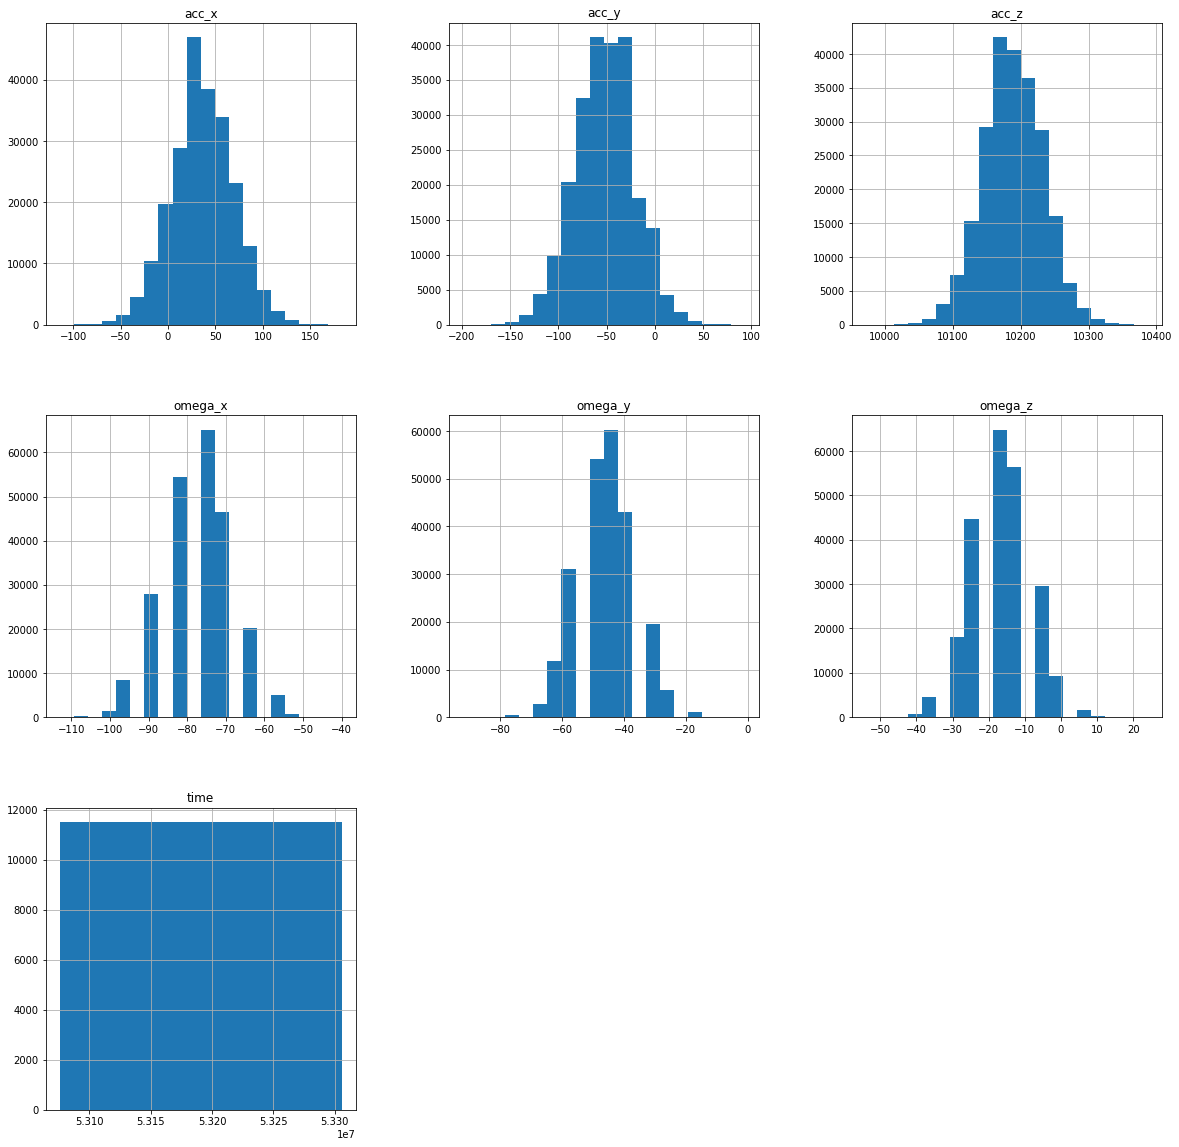

In [216]:
df.hist(figsize=(20, 20), bins=20)
plt.show()

⬛︎ ヒストグラム，正規Q-Qプロットおよび箱ひげ図を横に並べて描く(p.290)。  
□その前に，必要なデータフレーム関するメソッドと，`matplotlib.pyplot`モジュールにあるグラフ描画のための関数の公式を書いておこう：

****
**```
データフレームオブジェクト.columns.values
```**  
`Return : データフレーム`の行番号またはそれに当たる項目名のリストを返す
****

****
**``
データフレームオブジェクト.iloc[:, 列のindex]
``**  
`Return : `データフレームの指定された`列のindex (0,1,2,...)`に対応する項目の**データシリーズ**を取り出す。
> 取り出したデータは`pandas`の`Series`（正確には`pandas.core.series.Series`）というオブジェクトで
```
0          8
1          8
2          2
3          2
4          2
5          2
6         -4
7        -16
8        -16
9        -16
10         2
11       -10
12       -10
13       -16
```
というシリーズを返す。ここで上記右列の`0,1,2,...,13`は単なるレコード番号，左列の`8,8,2,...-16`はデータシリーズである。
****

****
**```
plt.hist(データシリーズ, bins=正の整数)
```**  
` Return : データシリーズ`のヒストグラムオブジェクト
- `bins=正の整数` は階級数の指定（省略した場合は階級数10）
****

****
**```
stats.probplot(データシリーズ, dist="norm", plot=plt)
```**  
`Return : データシリーズ`の正規Q-Qプロットオブジェクト
****

****
**```
plot.boxplot(データシリーズ, labels=リスト)
```**  
` Return : データシリーズ`の箱ひげ図オブジェクト
- labels=リストは複数の箱ひげ図に項目名を表示する場合に使用する（省略した場合は，`1,2,...`と表示されるので，これが不必要な場合は`labels=['']`とすればよい）
****

□まずはデータフレームdfから，項目リストを取得する：

In [217]:
item = df.columns.values
print(item)

['item' 'time' 'acc_x' 'acc_y' 'acc_z' 'omega_x' 'omega_y' 'omega_z']


> リスト変数`item`に`df`の項目名が，確かに取得されている。

□`for`文を使って，`'acc_x', 'acc_y', 'acc_z', 'omega_x', 'omega_y', 'omega_z'`のヒストグラム，Q-Qプロット，箱ひげ図を順に描画していく：

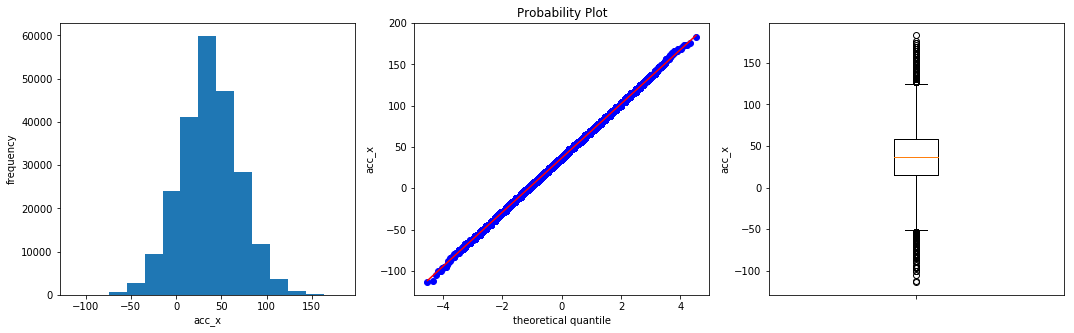

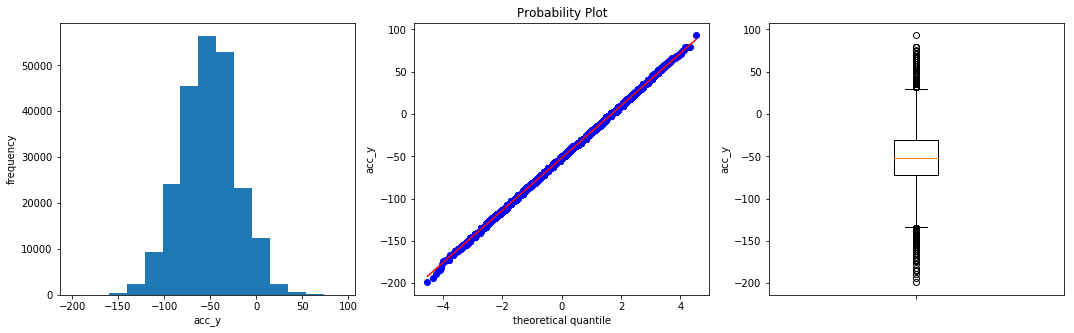

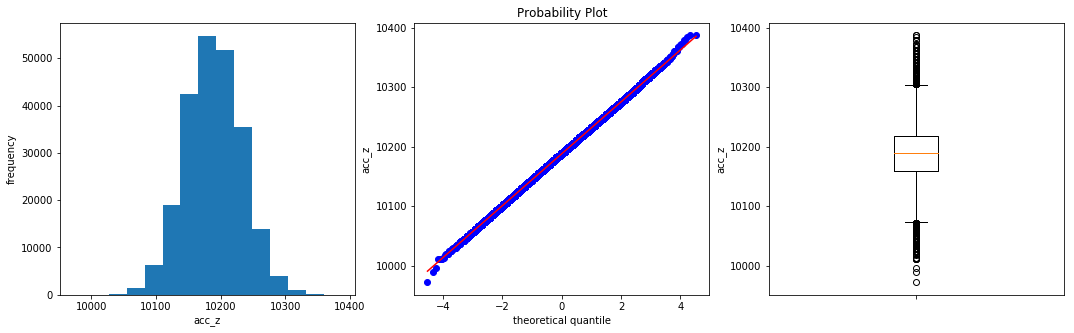

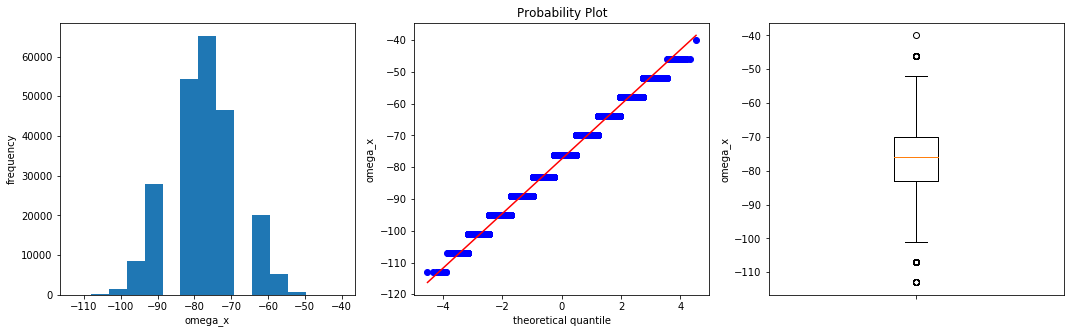

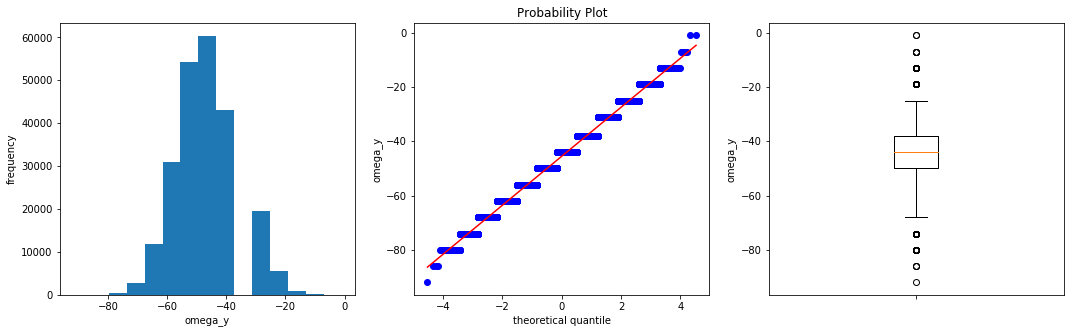

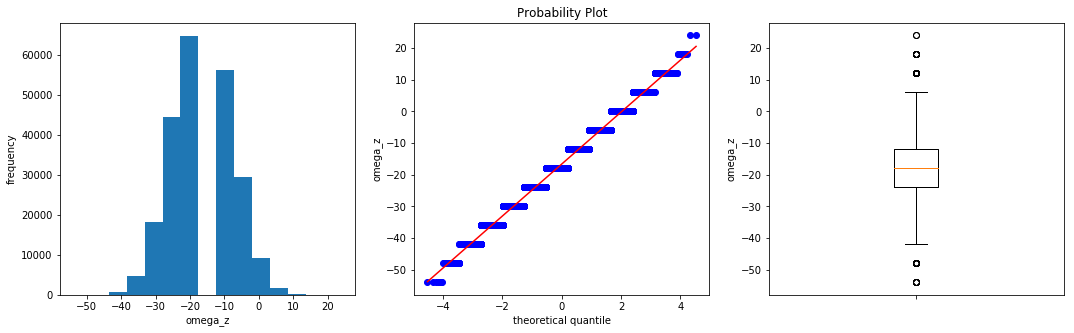

In [221]:
for i in range(2,8):           #iについて2,3,...,7を逐次代入して以下のブロックを繰り返す

    plt.figure(figsize=(18,5)) #１描画パレットをサイズを18:5に設定

    ###### ヒストグラム #####
    plt.subplot(1,3,1)                  #パレットを1行3列に分割し，最左列に以下のグラフを描画
    plt.hist(df.iloc[:, i], bins=15)   #dfのi列目の項目データについて100区切りのヒストグラムを描画
    plt.xlabel(f'{item[i]}')            #x軸ラベルをitemリストのi番目の要素に設定
    plt.ylabel('frequency')             #y軸ラベルを'frequency'に設定

    ##### Q-Qプロット #####
    plt.subplot(1,3,2)                                   #パレットを1行3列に分割し，中間列に以下のグラフを描画
    stats.probplot(df.iloc[:, i], dist="norm", plot=plt) #dfのi列目の項目データのQ-Qプロットを描画
    plt.xlabel('theoretical quantile')                   #x軸ラベルを'theoretical quantile'に設定
    plt.ylabel(f'{item[i]}')                             #y軸ラベルをitemリストのi番目の要素に設定

    ##### 箱ひげ図 #####
    plt.subplot(1,3,3)                      #パレットを1行3列に分割し，最右列に以下のグラフを描画
    plt.boxplot(df.iloc[:, i], labels=['']) #dfのi列目の項目データの箱ひげ図を描画(x軸メモリに何も表示しない)
    plt.ylabel(f'{item[i]}')                #y軸ラベルをitemリストのi番目の要素に設定
    
    plt.show()  #各種グラフ描画関数の戻り値を表示しない

> 

> 上図から全ての物理量データの分布が正規分布だ。角速度についてのヒストグラムが**歯抜け**していることは気にするな。これは，階級数の取り方で異なってくる。重要なのは，正規Q-Qプロットで，全て**理論直線上に乗る**。これでデータ分布が**正規分布**していることが分かる。

In [184]:
def normal_series(dfrm, item):
    '''
    データフレームdfrmの項目itemのデータから，外れ値を取り除いたpandas.DataFrame.Seriesを返す.
    
    Parameters
    ----------
    dfrm : データフレーム変数.
    
    item : データフレーム項目名.
        正の整数のとき，データフレーム項目リストのindex.
    '''
    if type(item) == int:
        item = dfrm.columns.values[item]
    series = dfrm[item]
    m = series.describe()['mean']  #平均値
    s = series.describe()['std']   #標準偏差
    lower_lim = m - s * 4     #平均値+
    upper_lim = m + s * 4     #ひげの最大値
    return dfrm.query(f'{lower_lim} <= {item} <= {upper_lim}').loc[:,item]  #dfrmのitemデータから外れ値を取り除いたシリーズ

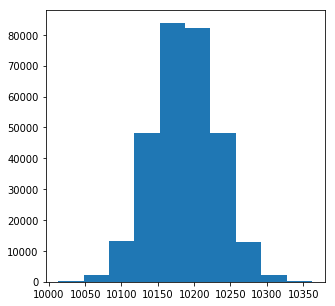

In [185]:
plt.figure(figsize=(5,5))
plt.hist(normal_series(df, 4))
plt.show()

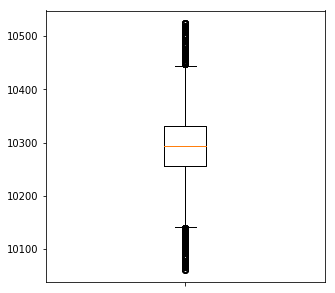

In [165]:
plt.figure(figsize=(5,5))
plt.boxplot(normal_series(df, 4), labels=[''])
plt.show()

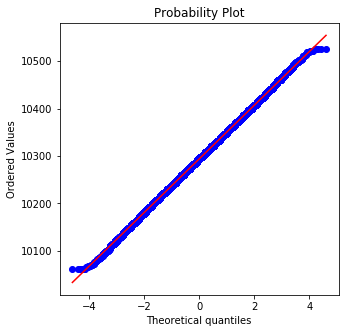

In [166]:
plt.figure(figsize=(5,5))
stats.probplot(normal_series(df, 4), dist="norm", plot=plt)
plt.show()

In [167]:
normal_series(df, 'acc_y').skew()

-0.007248395914432988

In [64]:
(normal_series(df, 'acc_y')).kurt()

-0.24935058533072674